In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏùò Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Í∞êÏûê/Í∞êÏûê(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding='cp949', parse_dates=["week_start"])
df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month
df['week'] = df['week_start'].dt.isocalendar().week

# Í≥ÑÏ†à Ïª¨Îüº ÏÉùÏÑ±
def get_season(month):
    if month in [3, 4, 5]:
        return 'Î¥Ñ'
    elif month in [6, 7, 8]:
        return 'Ïó¨Î¶Ñ'
    elif month in [9, 10, 11]:
        return 'Í∞ÄÏùÑ'
    else:
        return 'Í≤®Ïö∏'

df['season'] = df['month'].apply(get_season)

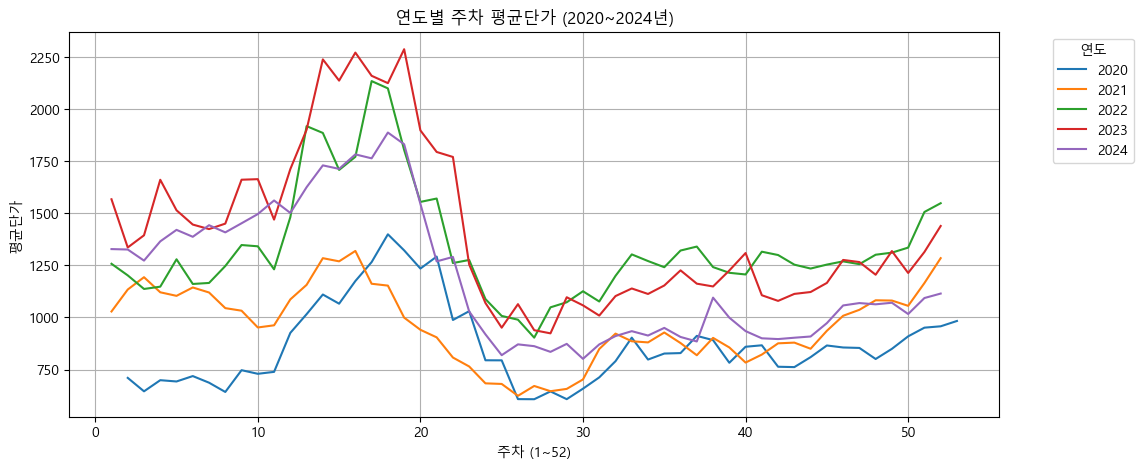

In [44]:
df_filtered = df[df['year'].between(2020, 2024)]

weekly_avg = df_filtered.groupby(['week', 'year'])['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'].mean().unstack()

weekly_avg.plot(figsize=(12, 5), title = "Ïó∞ÎèÑÎ≥Ñ Ï£ºÏ∞® ÌèâÍ∑†Îã®Í∞Ä (2020~2024ÎÖÑ)")
plt.xlabel("Ï£ºÏ∞® (1~52)")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä")
plt.legend(title='Ïó∞ÎèÑ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

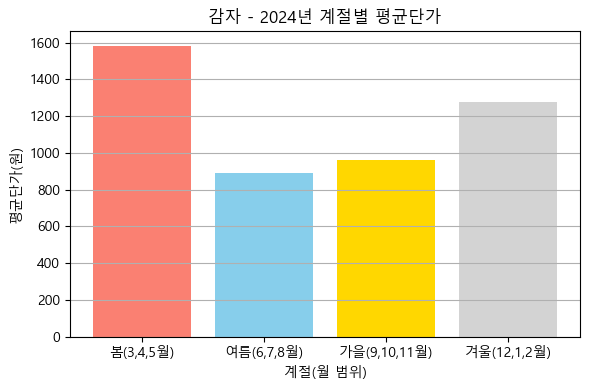

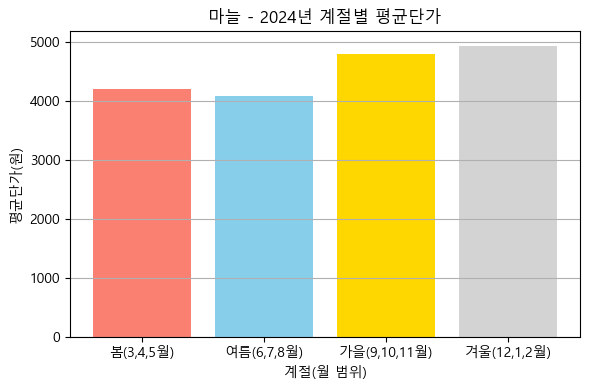

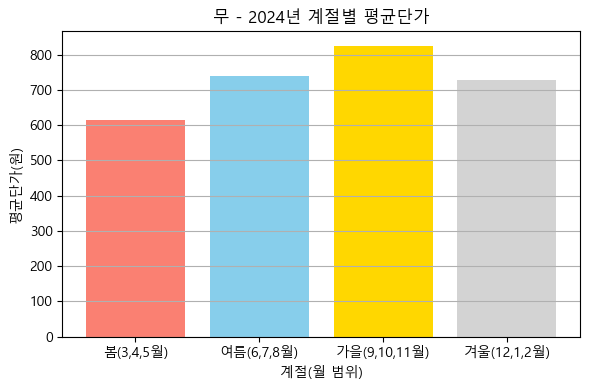

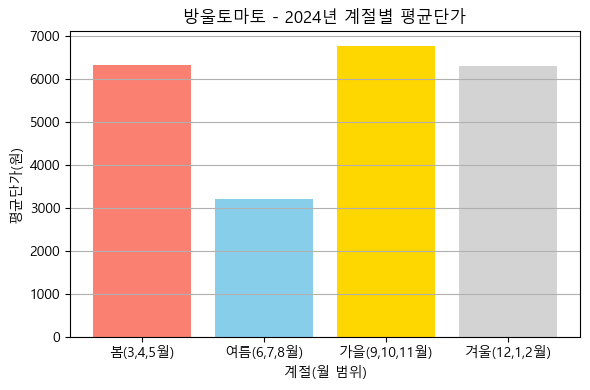

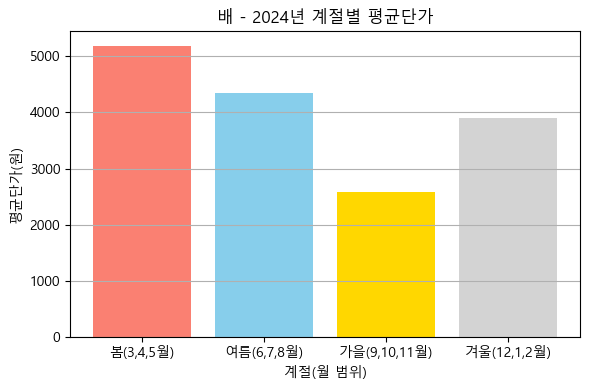

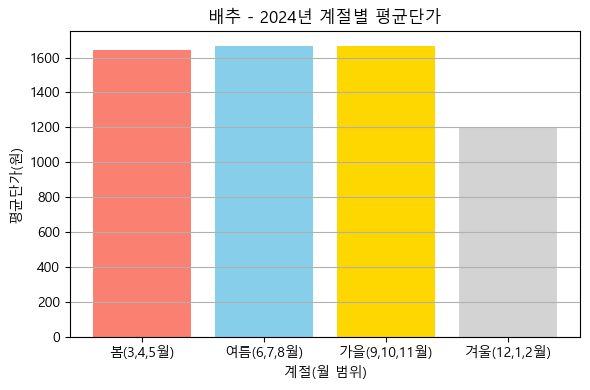

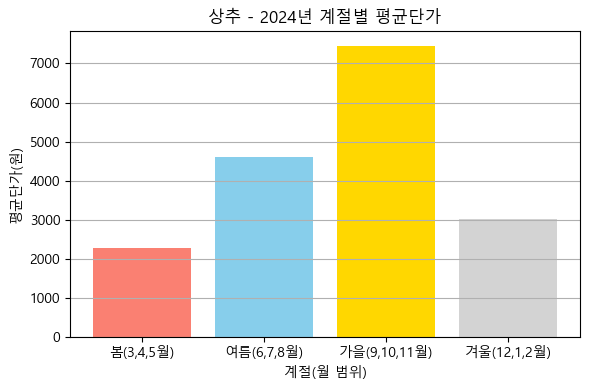

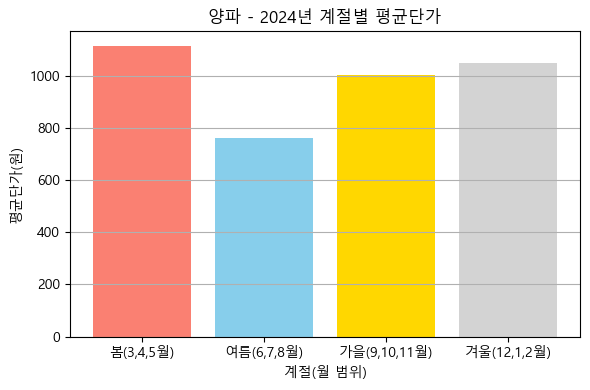

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Patch
import seaborn as sns
import re

plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏùò Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

file_list = glob.glob('EDA/*.csv')

def get_season(month):
    if month in [3, 4, 5]:
        return 'Î¥Ñ'
    elif month in [6, 7, 8]:
        return 'Ïó¨Î¶Ñ'
    elif month in [9, 10, 11]:
        return 'Í∞ÄÏùÑ'
    else:
        return 'Í≤®Ïö∏'
    
season_legend = {
    'Î¥Ñ': '3,4,5Ïõî',
    'Ïó¨Î¶Ñ': '6,7,8Ïõî',
    'Í∞ÄÏùÑ': '9,10,11Ïõî',
    'Í≤®Ïö∏': '12,1,2Ïõî'
}

# Í≥ÑÏ†àÎ≥Ñ ÏÉâÏÉÅ
season_colors = {
    'Î¥Ñ': 'salmon',
    'Ïó¨Î¶Ñ': 'skyblue',
    'Í∞ÄÏùÑ': 'gold',
    'Í≤®Ïö∏': 'lightgray'
}

for file_path in file_list:
    try:
        df = pd.read_csv(file_path, encoding = 'cp949', parse_dates=['week_start'])

        # Ïó∞ÎèÑ Î∞è Ï£ºÏ∞® Ï∂îÏ∂ú
        df['year'] = df['week_start'].dt.year
        df['month'] = df['week_start'].dt.month
        df['season'] = df['month'].apply(get_season)

        # 2024ÎÖÑÎßå ÌïÑÌÑ∞ÎßÅ
        df_2024 = df[df['year'] == 2024]

        # Í≥ÑÏ†àÎ≥Ñ ÌèâÍ∑†Îã®Í∞Ä Í≥ÑÏÇ∞
        seasonal_avg = df_2024.groupby('season')['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'].mean().reindex(['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≤®Ïö∏'])

        # ÌíàÎ™©Î™Ö Ï∂îÏ∂ú (ÌååÏùºÎ™ÖÏóêÏÑú)
        filename = os.path.basename(file_path)
        item_name = re.split(r'\(', filename)[0]

        # ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(6, 4))

        seasons = seasonal_avg.index.tolist()
        values = seasonal_avg.values.tolist()
        colors = [season_colors[s] for s in seasons]

        # ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
        plt.bar(range(len(seasons)), values, color=colors)

        # XÏ∂ï Î†àÏù¥Î∏îÏóê Ïõî Ìè¨Ìï®
        xtick_labels = [f"{s}({season_legend[s]})" for s in seasons]
        plt.xticks(ticks=range(len(seasons)), labels=xtick_labels, rotation=0)

        plt.title(f"{item_name.strip()} - 2024ÎÖÑ Í≥ÑÏ†àÎ≥Ñ ÌèâÍ∑†Îã®Í∞Ä")
        plt.xlabel("Í≥ÑÏ†à(Ïõî Î≤îÏúÑ)")
        plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)")
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {file_path}")
        print(f"ÏóêÎü¨ ÎÇ¥Ïö©: {e}")

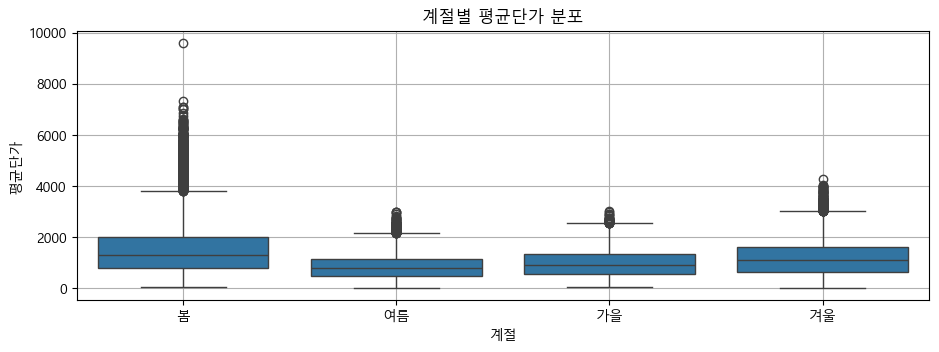

In [49]:
plt.figure(figsize=(11, 3.5))
sns.boxplot(x='season', y='ÌèâÍ∑†Îã®Í∞Ä(Ïõê)', data=df, order=['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≤®Ïö∏'])
plt.title("Í≥ÑÏ†àÎ≥Ñ ÌèâÍ∑†Îã®Í∞Ä Î∂ÑÌè¨")
plt.xlabel("Í≥ÑÏ†à")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä")
plt.grid(True)
plt.show()

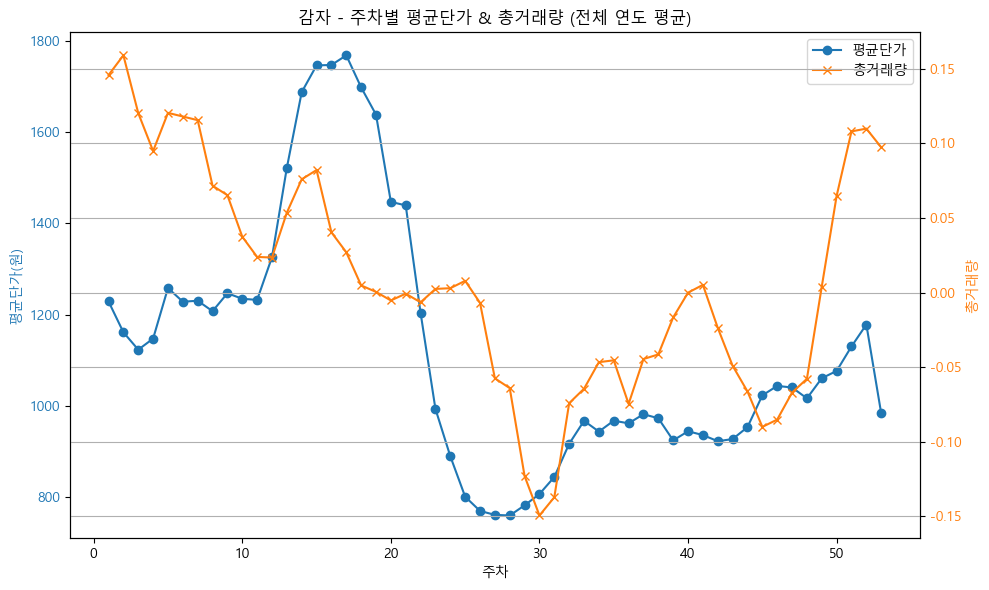

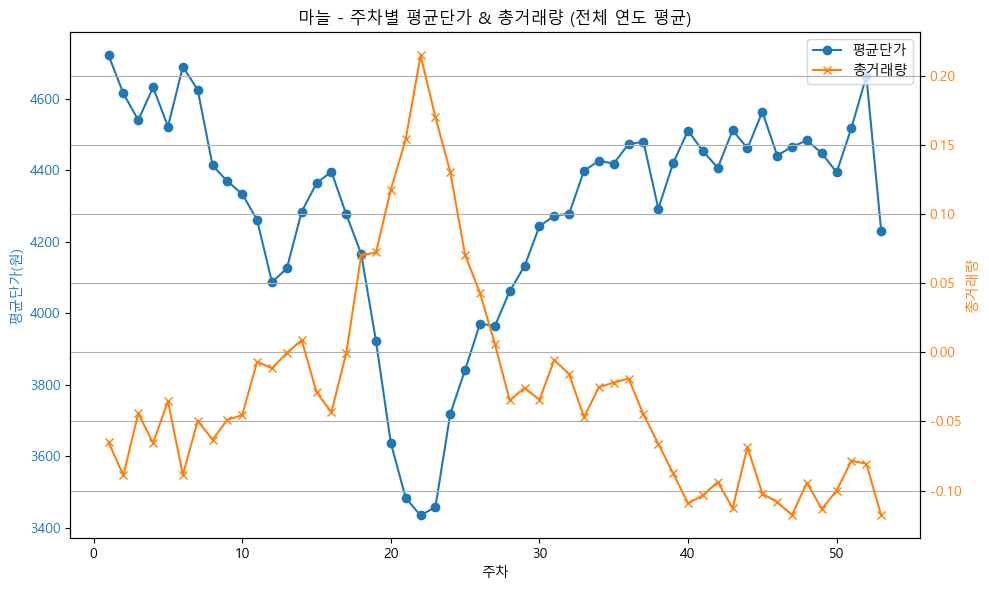

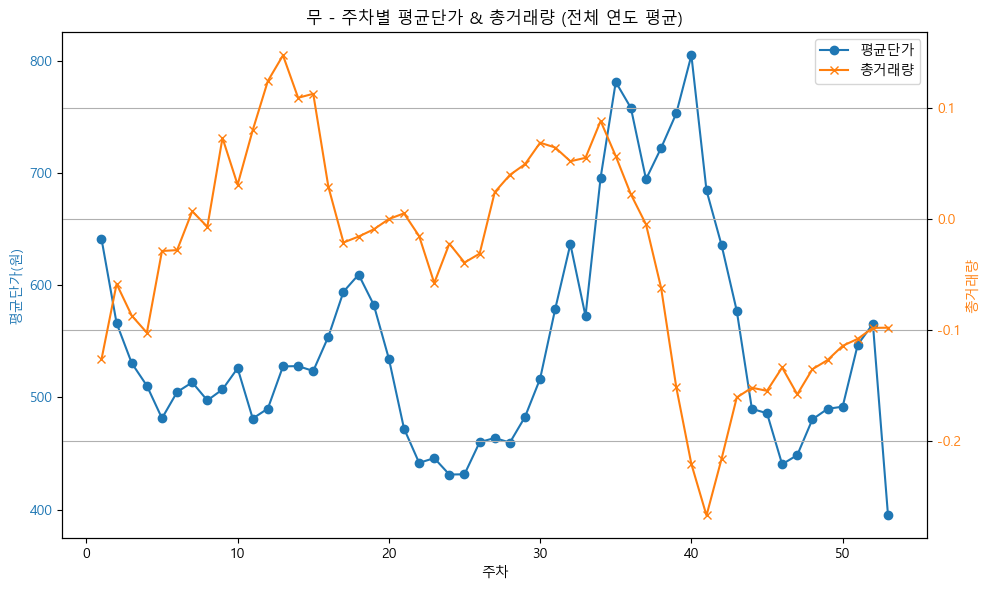

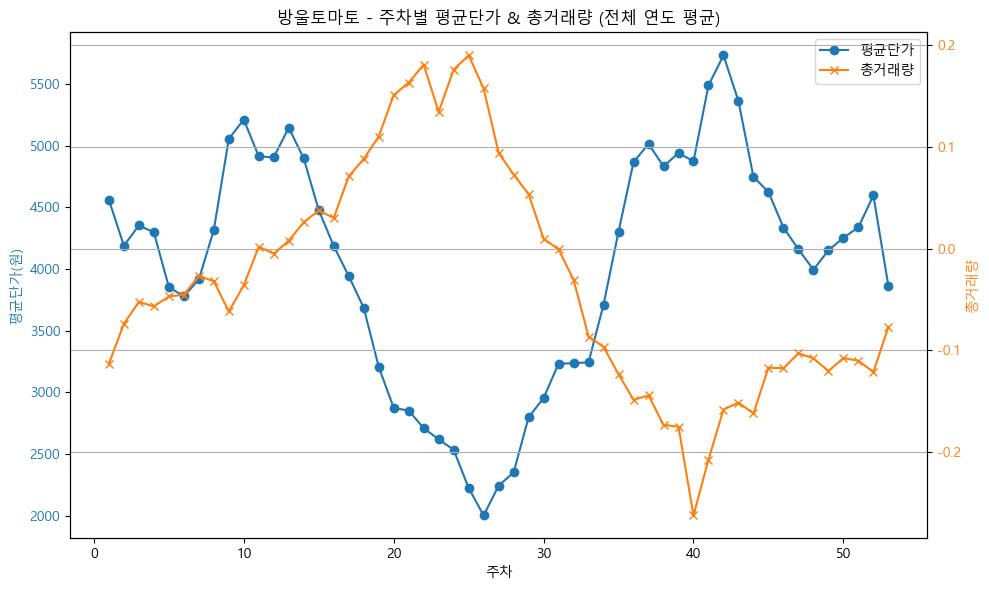

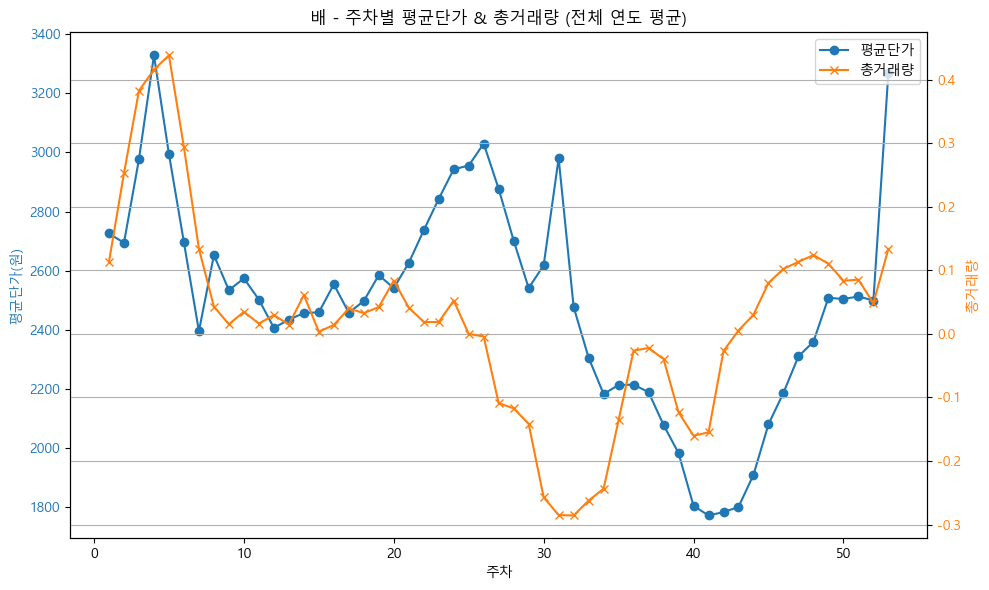

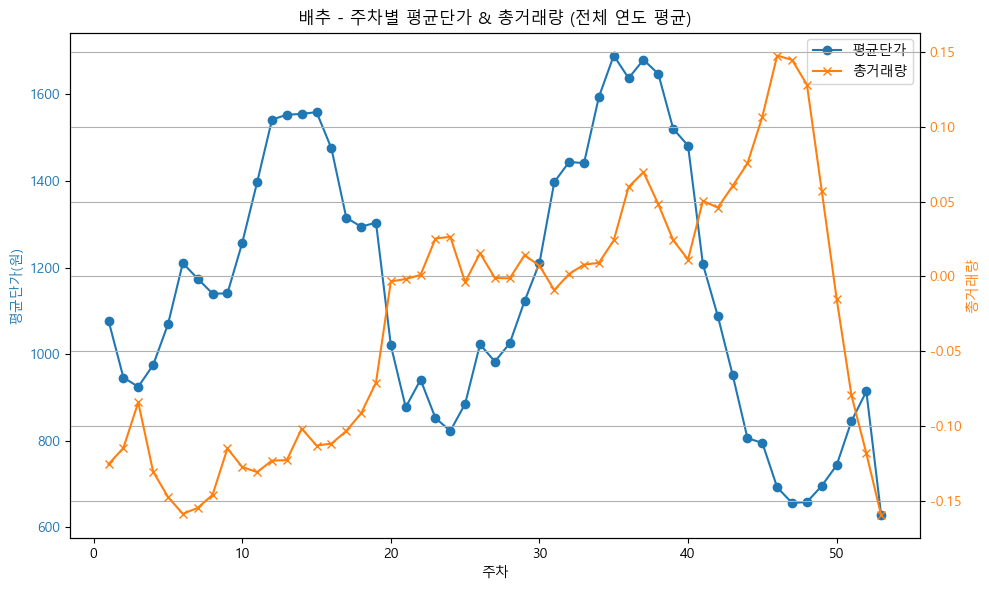

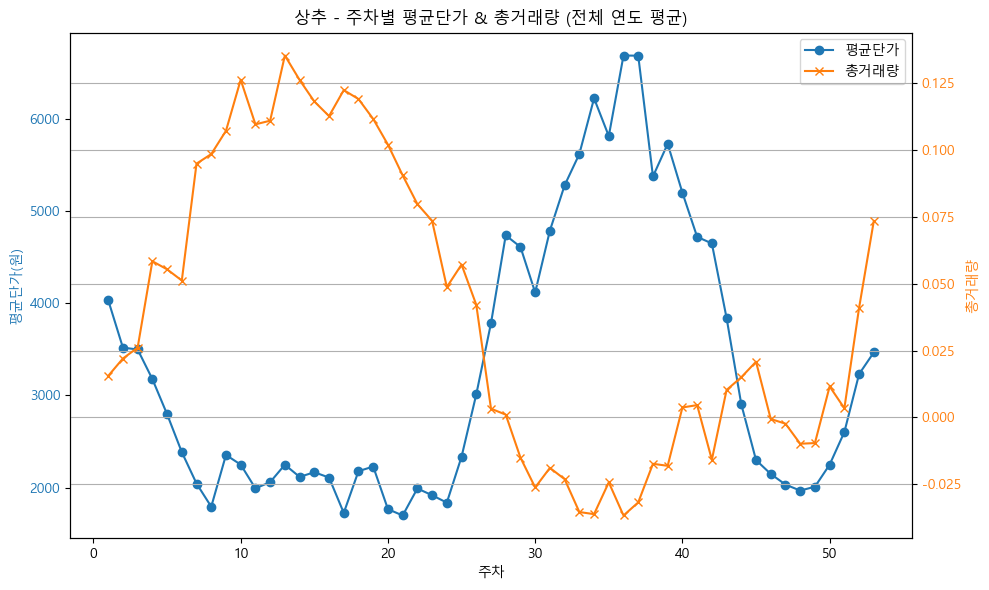

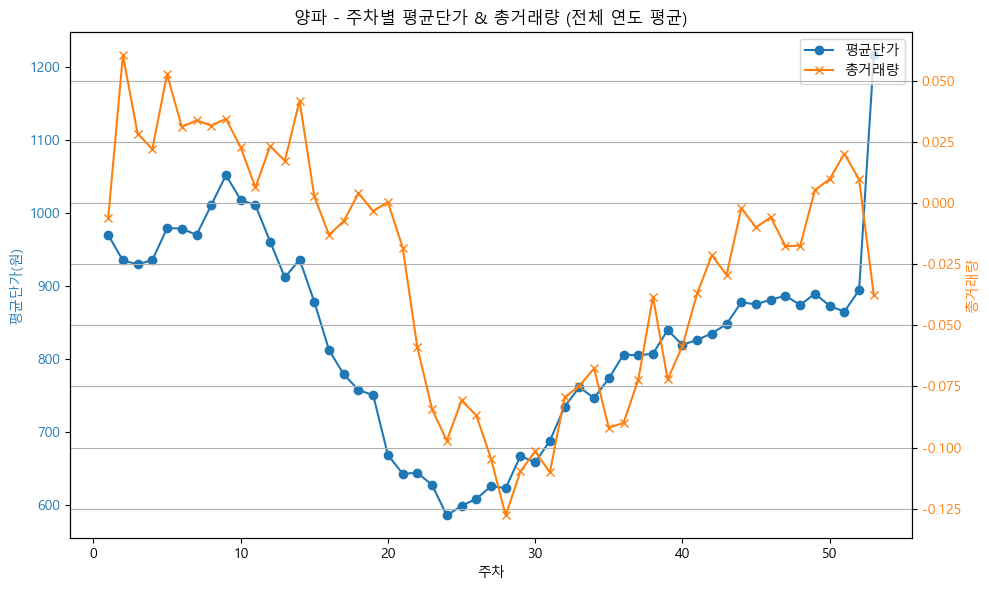

In [15]:
file_list = glob.glob('EDA/*.csv')

for file_path in file_list:
    try:
        df = pd.read_csv(file_path, encoding='cp949', parse_dates=['week_start'])

        df['week'] = df['week_start'].dt.isocalendar().week

        weekly_avg = df.groupby('week')[['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)', 'Ï¥ùÍ±∞ÎûòÎüâ(kg)']].mean().reset_index()

        filename = os.path.basename(file_path)
        item_name = re.split(r'\(', filename)[0].strip()

        # Ïù¥Ï§ëÏ∂ï Í∑∏ÎûòÌîÑ
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Ï≤´ Î≤àÏß∏ YÏ∂ï (ÌèâÍ∑†Îã®Í∞Ä)
        line1, = ax1.plot(weekly_avg['week'], weekly_avg['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'], color='tab:blue', marker='o', label='ÌèâÍ∑†Îã®Í∞Ä')
        ax1.set_xlabel("Ï£ºÏ∞®")
        ax1.set_ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)", color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Îëê Î≤àÏß∏ YÏ∂ï (Í±∞ÎûòÎüâ)
        ax2 = ax1.twinx()
        line2, = ax2.plot(weekly_avg['week'], weekly_avg['Ï¥ùÍ±∞ÎûòÎüâ(kg)'], color='tab:orange', marker='x', label='Ï¥ùÍ±∞ÎûòÎüâ')
        ax2.set_ylabel("Ï¥ùÍ±∞ÎûòÎüâ", color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='tab:orange')
        
        # Î≤îÎ°Ä ÌÜµÌï©
        lines = [line1, line2]
        labels = [line.get_label() for line in lines]
        ax1.legend(lines, labels, loc='upper right')

        # Ï†úÎ™© Î∞è Î†àÏù¥ÏïÑÏõÉ
        plt.title(f"{item_name} - Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑†Îã®Í∞Ä & Ï¥ùÍ±∞ÎûòÎüâ (Ï†ÑÏ≤¥ Ïó∞ÎèÑ ÌèâÍ∑†)")
        fig.tight_layout()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {file_path}")
        print(f"ÏóêÎü¨ ÎÇ¥Ïö©: {e}")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Í∞êÏûê/Í∞êÏûê(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding='cp949', parse_dates=["week_start"])

plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏùò Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month
df['week'] = df['week_start'].dt.isocalendar().week
df['dayofweek'] = df['week_start'].dt.dayofweek

In [3]:
# ÌÉÄÍ≤ü: Îã§Ïùå Ï£ºÏùò ÌèâÍ∑†Îã®Í∞Ä ÏòàÏ∏°
target_col = 'ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'
X = df.drop(columns=[target_col, 'week_start'])  # week_startÎäî ÏãúÍ∞Ñ Ïù∏Îç±Ïä§Ïù¥ÎØÄÎ°ú Ï†úÏô∏
y = df[target_col]

‚úÖ Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å (2024ÎÖÑÍπåÏßÄ)


In [4]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [8]:
for i, (train_idx, test_idx) in enumerate(tscv.split(df), 1):
    print(f"[Fold {i}]")
    print("Train Í∏∞Í∞Ñ:", df.iloc[train_idx[0]]['week_start'], "‚Üí", df.iloc[train_idx[-1]]['week_start'])
    print("Test  Í∏∞Í∞Ñ:", df.iloc[test_idx[0]]['week_start'], "‚Üí", df.iloc[test_idx[-1]]['week_start'])

[Fold 1]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2019-03-25 00:00:00
Test  Í∏∞Í∞Ñ: 2019-03-25 00:00:00 ‚Üí 2020-04-27 00:00:00
[Fold 2]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2020-04-27 00:00:00
Test  Í∏∞Í∞Ñ: 2020-04-27 00:00:00 ‚Üí 2021-06-21 00:00:00
[Fold 3]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2021-06-21 00:00:00
Test  Í∏∞Í∞Ñ: 2021-06-21 00:00:00 ‚Üí 2022-09-26 00:00:00
[Fold 4]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2022-09-26 00:00:00
Test  Í∏∞Í∞Ñ: 2022-09-26 00:00:00 ‚Üí 2024-02-05 00:00:00
[Fold 5]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2024-02-05 00:00:00
Test  Í∏∞Í∞Ñ: 2024-02-05 00:00:00 ‚Üí 2025-05-26 00:00:00


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
tscv = TimeSeriesSplit(n_splits=5)

mae_list, rmse_list, r2_list = [], [], []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"[Fold {fold}] MAE: {mae:.2f} | RMSE: {rmse:.2f} | R¬≤: {r2:.4f}")

[Fold 1] MAE: 376.53 | RMSE: 479.51 | R¬≤: 0.1619
[Fold 2] MAE: 237.22 | RMSE: 321.98 | R¬≤: 0.6215
[Fold 3] MAE: 314.67 | RMSE: 427.18 | R¬≤: 0.5527
[Fold 4] MAE: 208.51 | RMSE: 286.41 | R¬≤: 0.8336
[Fold 5] MAE: 317.26 | RMSE: 405.08 | R¬≤: 0.6609


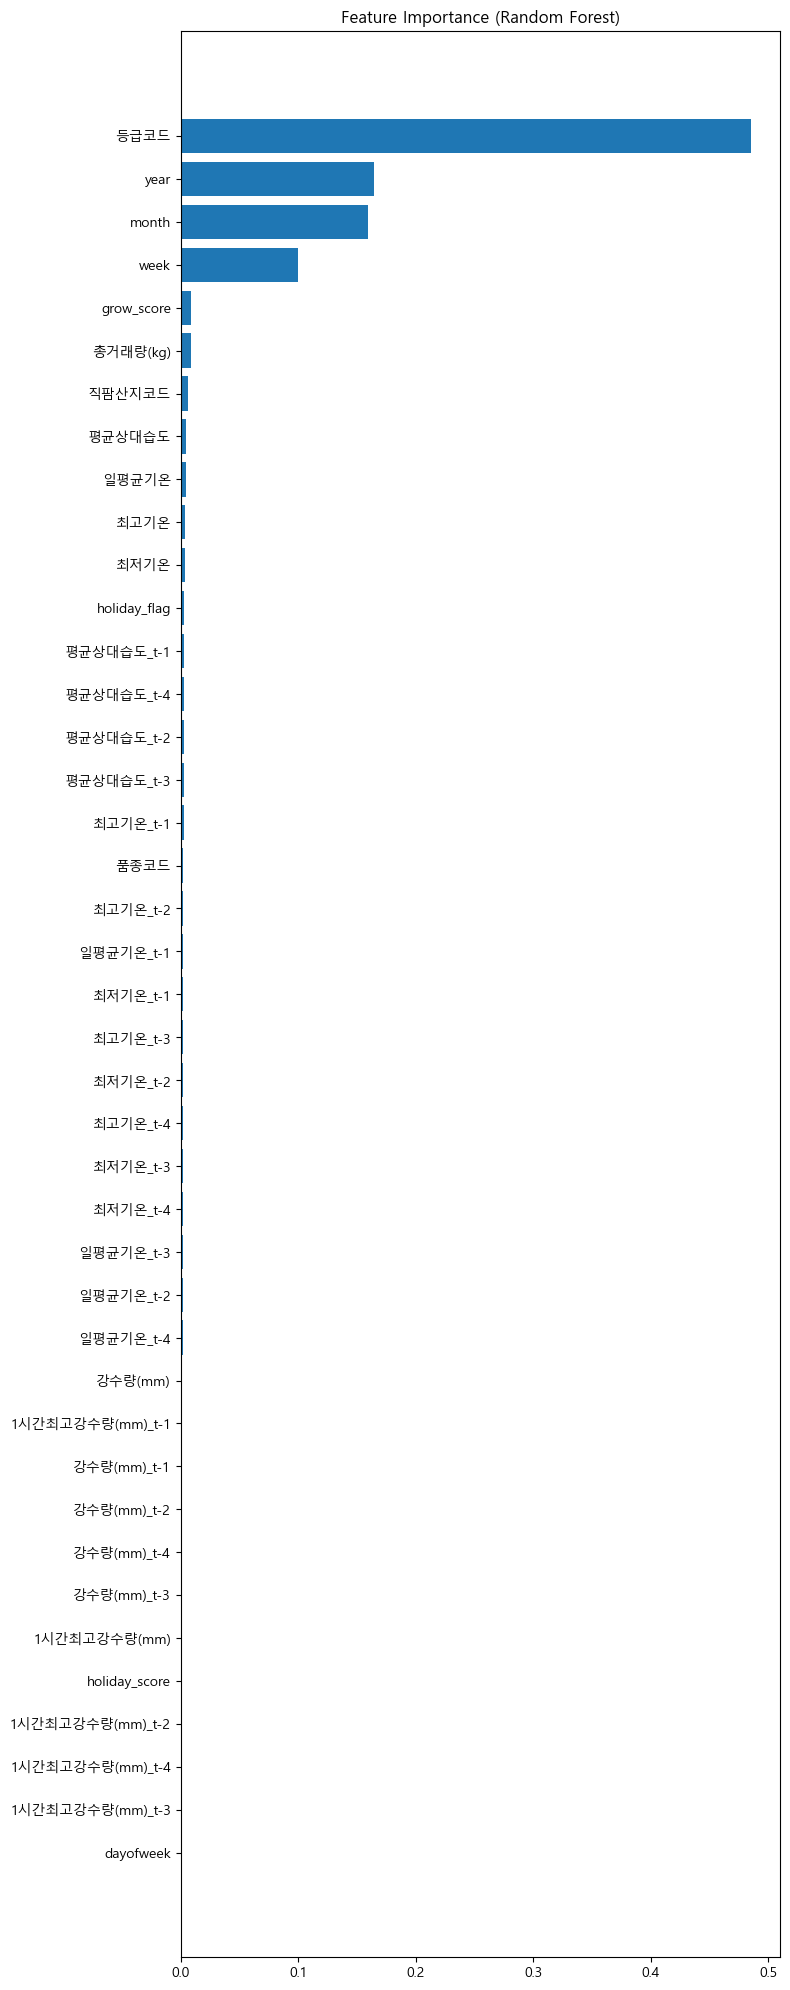

In [6]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú ÌïôÏäµ
model.fit(X, y)

# Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, len(feature_names)//2))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from xgboost import XGBRegressor

# 1. CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("EDA/Î¨¥(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding="cp949")

# 2. Ï†ÑÏ≤òÎ¶¨
df = df.drop(columns=["Îì±Í∏âÏΩîÎìú"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# Ï£ºÏ∞®Î•º Ï£ºÍ∏∞Î°ú Î≥ÄÌôò (1ÎÖÑ 52Ï£º)
df_model["week_sin"] = np.sin(2 * np.pi * df_model["week"] / 52)
df_model["week_cos"] = np.cos(2 * np.pi * df_model["week"] / 52)

# 3. Î≥ÄÏàò Ï†ïÏùò
target_col = "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"
lag_features = [
    "ÏùºÌèâÍ∑†Í∏∞Ïò®", "ÏµúÍ≥†Í∏∞Ïò®", "ÏµúÏ†ÄÍ∏∞Ïò®", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ", "Í∞ïÏàòÎüâ(mm)", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-1", "ÏµúÍ≥†Í∏∞Ïò®_t-1", "ÏµúÏ†ÄÍ∏∞Ïò®_t-1", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-1", "Í∞ïÏàòÎüâ(mm)_t-1", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-1",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-2", "ÏµúÍ≥†Í∏∞Ïò®_t-2", "ÏµúÏ†ÄÍ∏∞Ïò®_t-2", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-2", "Í∞ïÏàòÎüâ(mm)_t-2", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-2",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-3", "ÏµúÍ≥†Í∏∞Ïò®_t-3", "ÏµúÏ†ÄÍ∏∞Ïò®_t-3", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-3", "Í∞ïÏàòÎüâ(mm)_t-3", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-3"
]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["ÌíàÏ¢ÖÏΩîÎìú", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"]
numeric_features = ["Ï¥ùÍ±∞ÎûòÎüâ(kg)"]

# 4. feature Íµ¨ÏÑ±
used_features = numeric_features + lag_features + derived_features + categorical_cols + ["year", "week", "week_start"]
df_model = df.dropna(subset=[target_col] + used_features)

# 5. Ïõê-Ìï´ Ïù∏ÏΩîÎî©
df_model = pd.get_dummies(df_model, columns=categorical_cols)

In [23]:
# 6. X, y Î∂ÑÎ¶¨
y = df_model[target_col]
X = df_model.drop(columns=[target_col])

# 7. ÌïôÏäµÏÖã Íµ¨ÏÑ± (2025ÎÖÑ Ï†úÏô∏)
df_model = df_model[df_model["year"] <= 2024].copy()
y = df_model["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"]
X = df_model.drop(columns=["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)", "year", "week", "week_start"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

# 8. ÌïôÏäµ/Í≤ÄÏ¶ù Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 9. Î™®Îç∏ Î∞è ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

param_grid = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0]
}

# 10. RMSEÎ•º ÏµúÏÜåÌôîÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú GridSearchCV Íµ¨ÏÑ±
rmse_scorer = make_scorer(mean_squared_error, squared=False)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=3,  # ÍµêÏ∞®Í≤ÄÏ¶ù fold Ïàò
    verbose=1,
    n_jobs=-1
)

# 11. ÌïôÏäµ
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 8], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(mean_squared_error, squared=False), verbose=1)

In [25]:
# 12. Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ Best parameters:", grid_search.best_params_)
print("‚úÖ Best RMSE:", grid_search.best_score_)

‚úÖ Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
‚úÖ Best RMSE: 295.2413365345303


In [26]:
from sklearn.metrics import r2_score

# 1. ÏµúÏ†Å Î™®Îç∏ Ï∂îÏ∂ú
best_model = grid_search.best_estimator_

# 2. testÏÖã ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = best_model.predict(X_val)

# 3. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"‚úÖ RMSE (test): {rmse:,.2f}")
print(f"‚úÖ MAE (test): {mae:,.2f}")
print(f"‚úÖ R¬≤ Score (test): {r2:.4f}")

‚úÖ RMSE (test): 292.22
‚úÖ MAE (test): 224.45
‚úÖ R¬≤ Score (test): 0.1679


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from xgboost import XGBRegressor

# 1. CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("EDA/Î¨¥(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding="cp949")

# 2. Ï†ÑÏ≤òÎ¶¨
df = df.drop(columns=["Îì±Í∏âÏΩîÎìú"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 3. Ï£ºÏ∞®Î•º Ï£ºÍ∏∞Î°ú Î≥ÄÌôò (1ÎÖÑ 52Ï£º)
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 4. Î≥ÄÏàò Ï†ïÏùò
target_col = "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"
lag_features = [
    "ÏùºÌèâÍ∑†Í∏∞Ïò®", "ÏµúÍ≥†Í∏∞Ïò®", "ÏµúÏ†ÄÍ∏∞Ïò®", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ", "Í∞ïÏàòÎüâ(mm)", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-1", "ÏµúÍ≥†Í∏∞Ïò®_t-1", "ÏµúÏ†ÄÍ∏∞Ïò®_t-1", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-1", "Í∞ïÏàòÎüâ(mm)_t-1", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-1",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-2", "ÏµúÍ≥†Í∏∞Ïò®_t-2", "ÏµúÏ†ÄÍ∏∞Ïò®_t-2", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-2", "Í∞ïÏàòÎüâ(mm)_t-2", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-2",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-3", "ÏµúÍ≥†Í∏∞Ïò®_t-3", "ÏµúÏ†ÄÍ∏∞Ïò®_t-3", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-3", "Í∞ïÏàòÎüâ(mm)_t-3", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-3"
]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["ÌíàÏ¢ÖÏΩîÎìú", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"]
numeric_features = ["Ï¥ùÍ±∞ÎûòÎüâ(kg)", "week_sin", "week_cos"]

used_features = numeric_features + lag_features + derived_features + categorical_cols + ["year", "week", "week_start"]

In [28]:
# 5. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_model = df.dropna(subset=[target_col] + used_features).copy()

# 6. Ïõê-Ìï´ Ïù∏ÏΩîÎî©
df_model = pd.get_dummies(df_model, columns=categorical_cols)

# 7. 2025ÎÖÑ Ï†úÏô∏ ÌõÑ X, y Î∂ÑÎ¶¨
df_model = df_model[df_model["year"] <= 2024]
y = df_model["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"]
X = df_model.drop(columns=["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)", "year", "week", "week_start"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

In [29]:
# 8. TimeSeriesSplit Ï†ïÏùò
tscv = TimeSeriesSplit(n_splits=5)

# 9. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0]
}

In [30]:
# 10. RMSE Í∏∞Ï§Ä scorer ÏÑ§Ï†ï
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# 11. GridSearchCV Íµ¨ÏÑ±
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror", random_state=42),
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

In [31]:
# 12. ÌïôÏäµ
grid_search.fit(X, y)

# 13. Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ Best parameters:", grid_search.best_params_)
print("‚úÖ Best RMSE:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
‚úÖ Best parameters: {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
‚úÖ Best RMSE: 342.86794029660666


In [32]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. CSV Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("EDA/Î¨¥(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding="cp949")
df = df.drop(columns=["Îì±Í∏âÏΩîÎìú"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 2. Ï£ºÍ∏∞ ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 3. Î≥ÄÏàò Ï†ïÏùò
target_col = "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"
lag_features = [
    "ÏùºÌèâÍ∑†Í∏∞Ïò®", "ÏµúÍ≥†Í∏∞Ïò®", "ÏµúÏ†ÄÍ∏∞Ïò®", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ", "Í∞ïÏàòÎüâ(mm)", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-1", "ÏµúÍ≥†Í∏∞Ïò®_t-1", "ÏµúÏ†ÄÍ∏∞Ïò®_t-1", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-1", "Í∞ïÏàòÎüâ(mm)_t-1", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-1",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-2", "ÏµúÍ≥†Í∏∞Ïò®_t-2", "ÏµúÏ†ÄÍ∏∞Ïò®_t-2", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-2", "Í∞ïÏàòÎüâ(mm)_t-2", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-2",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-3", "ÏµúÍ≥†Í∏∞Ïò®_t-3", "ÏµúÏ†ÄÍ∏∞Ïò®_t-3", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-3", "Í∞ïÏàòÎüâ(mm)_t-3", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-3"
]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["ÌíàÏ¢ÖÏΩîÎìú", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"]
numeric_features = ["Ï¥ùÍ±∞ÎûòÎüâ(kg)", "week_sin", "week_cos"]

used_features = numeric_features + lag_features + derived_features + categorical_cols + ["year", "week", "week_start"]

In [33]:
# 4. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ + ÏõêÌï´Ïù∏ÏΩîÎî©
df_model = df.dropna(subset=[target_col] + used_features).copy()
df_model = pd.get_dummies(df_model, columns=categorical_cols)

# 5. ÌïôÏäµ ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ± (2025 Ï†úÏô∏)
df_model = df_model[df_model["year"] <= 2024]
y = df_model["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"]
X = df_model.drop(columns=["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)", "year", "week", "week_start"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

In [34]:
# 6. ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
best_model = XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.2,
    max_depth=8,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
best_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
# 7. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# 8. Ï∂úÎ†•
print(f"‚úÖ RMSE (train): {rmse:.2f}")
print(f"‚úÖ MAE (train): {mae:.2f}")
print(f"‚úÖ R¬≤ Score (train): {r2:.4f}")

‚úÖ RMSE (train): 155.07
‚úÖ MAE (train): 118.35
‚úÖ R¬≤ Score (train): 0.7657


In [41]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("EDA/Î¨¥(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding="cp949")
df = df.drop(columns=["Îì±Í∏âÏΩîÎìú"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 2. Ï£ºÍ∏∞ ÌååÏÉùÎ≥ÄÏàò
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 3. Î≥ÄÏàò Ï†ïÏùò
target_col = "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"
lag_features = [
    "ÏùºÌèâÍ∑†Í∏∞Ïò®", "ÏµúÍ≥†Í∏∞Ïò®", "ÏµúÏ†ÄÍ∏∞Ïò®", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ", "Í∞ïÏàòÎüâ(mm)", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-1", "ÏµúÍ≥†Í∏∞Ïò®_t-1", "ÏµúÏ†ÄÍ∏∞Ïò®_t-1", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-1", "Í∞ïÏàòÎüâ(mm)_t-1", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-1",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-2", "ÏµúÍ≥†Í∏∞Ïò®_t-2", "ÏµúÏ†ÄÍ∏∞Ïò®_t-2", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-2", "Í∞ïÏàòÎüâ(mm)_t-2", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-2",
    "ÏùºÌèâÍ∑†Í∏∞Ïò®_t-3", "ÏµúÍ≥†Í∏∞Ïò®_t-3", "ÏµúÏ†ÄÍ∏∞Ïò®_t-3", "ÌèâÍ∑†ÏÉÅÎåÄÏäµÎèÑ_t-3", "Í∞ïÏàòÎüâ(mm)_t-3", "1ÏãúÍ∞ÑÏµúÍ≥†Í∞ïÏàòÎüâ(mm)_t-3"
]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["ÌíàÏ¢ÖÏΩîÎìú", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"]
numeric_features = ["Ï¥ùÍ±∞ÎûòÎüâ(kg)", "week_sin", "week_cos"]
used_features = numeric_features + lag_features + derived_features + categorical_cols + ["year", "week", "week_start"]

# 4. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Î∞è Ïù∏ÏΩîÎî©
df_model = df.dropna(subset=[target_col] + used_features).copy()
df_model = pd.get_dummies(df_model, columns=categorical_cols)

# 5. ÏµúÍ∑º 1ÎÖÑÏπò Í∏∞Ï§Ä ÌÖåÏä§Ìä∏ÏÖã Íµ¨ÏÑ± (52Ï£º Í∏∞Ï§Ä)
latest_date = df_model["week_start"].max()
cutoff_date = latest_date - pd.Timedelta(weeks=52)
test_df = df_model[df_model["week_start"] > cutoff_date].copy()

# 6. ÌïôÏäµÏÖã Íµ¨ÏÑ±: ÌÖåÏä§Ìä∏ ÏãúÏûë Ï†ÑÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞
train_df = df_model[df_model["week_start"] <= cutoff_date].copy()

# 7. X, y Î∂ÑÎ¶¨
X_train = train_df.drop(columns=[target_col, "year", "week", "week_start"], errors="ignore")
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col, "year", "week", "week_start"], errors="ignore")
y_test = test_df[target_col]

# 8. ÌÉÄÏûÖ Î≥ÄÌôò
X_train = X_train.select_dtypes(include=[np.number]).astype(np.float32)
X_test = X_test.select_dtypes(include=[np.number]).astype(np.float32)

# 9. Î™®Îç∏ ÌïôÏäµ (ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞)
model = XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.2,
    max_depth=8,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 10. ÌèâÍ∞Ä
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 11. Ï∂úÎ†•
print(f"‚úÖ RMSE (ÏµúÍ∑º 1ÎÖÑ): {rmse:.2f}")
print(f"‚úÖ MAE  (ÏµúÍ∑º 1ÎÖÑ): {mae:.2f}")
print(f"‚úÖ R¬≤ Score (ÏµúÍ∑º 1ÎÖÑ): {r2:.4f}")

‚úÖ RMSE (ÏµúÍ∑º 1ÎÖÑ): 512.46
‚úÖ MAE  (ÏµúÍ∑º 1ÎÖÑ): 402.06
‚úÖ R¬≤ Score (ÏµúÍ∑º 1ÎÖÑ): -0.8479


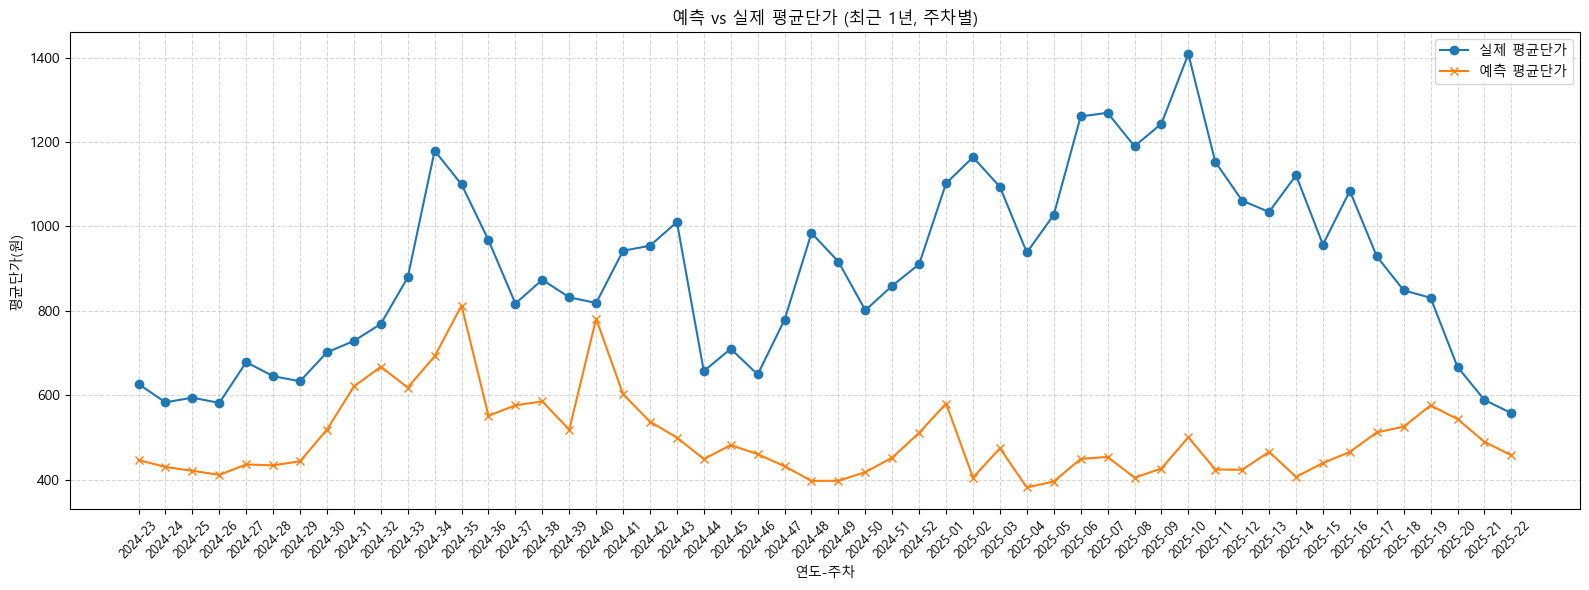

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1. ÏòàÏ∏° Í≤∞Í≥ºÎ•º test_dfÏóê Ï∂îÍ∞Ä
test_df = test_df.copy()
test_df["ÏòàÏ∏°Í∞í"] = y_pred
test_df["Ïã§Ï†úÍ∞í"] = y_test.values

# 2. ÏµúÍ∑º 1ÎÖÑ(52Ï£º) Ï£ºÏ∞® Ï†ïÎ≥¥ Ï†ïÎ†¨
recent_weeks = (
    test_df[["year", "week", "week_start"]]
    .drop_duplicates()
    .sort_values("week_start")
    .tail(52)
    .reset_index(drop=True)
)
recent_weeks["Ïó∞ÎèÑ_Ï£ºÏ∞®"] = recent_weeks["year"].astype(str) + "-" + recent_weeks["week"].astype(str).str.zfill(2)

# 3. Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† ÏßëÍ≥Ñ
weekly_result = (
    test_df.groupby(["year", "week"])[["Ïã§Ï†úÍ∞í", "ÏòàÏ∏°Í∞í"]]
    .mean()
    .reset_index()
)
weekly_result["Ïó∞ÎèÑ_Ï£ºÏ∞®"] = weekly_result["year"].astype(str) + "-" + weekly_result["week"].astype(str).str.zfill(2)

# 4. ÎàÑÎùΩ Ï£ºÏ∞® Ìè¨Ìï®Ìïú Î≥ëÌï©
plot_df = recent_weeks.merge(weekly_result, on=["year", "week", "Ïó∞ÎèÑ_Ï£ºÏ∞®"], how="left")

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 6))
plt.plot(plot_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"], plot_df["Ïã§Ï†úÍ∞í"], label="Ïã§Ï†ú ÌèâÍ∑†Îã®Í∞Ä", marker="o")
plt.plot(plot_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"], plot_df["ÏòàÏ∏°Í∞í"], label="ÏòàÏ∏° ÌèâÍ∑†Îã®Í∞Ä", marker="x")
plt.title("ÏòàÏ∏° vs Ïã§Ï†ú ÌèâÍ∑†Îã®Í∞Ä (ÏµúÍ∑º 1ÎÖÑ, Ï£ºÏ∞®Î≥Ñ)")
plt.xlabel("Ïó∞ÎèÑ-Ï£ºÏ∞®")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)")
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
import numpy as np
import pandas as pd

# 1. ÏòàÏ∏°Ìï† Ï£ºÏ∞® ÏÉùÏÑ±
future_weeks = [23, 24, 25, 26, 27, 28, 29, 30]
base_year = 2025
last_week_start = df_model[df_model["year"] == 2025]["week_start"].max()

# 2. ÏûÖÎ†• ÌÖúÌîåÎ¶ø ÏÉùÏÑ±: ÏµúÍ∑º Ï£ºÏ∞® ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõÄ
template = df_model[df_model["year"] == 2025].copy()
recent_avg = template.select_dtypes(include=[np.number]).mean()

# 3. Í∞Å Ï£ºÏ∞®Ïóê ÎåÄÌï¥ Ìñâ ÏÉùÏÑ±
future_rows = []
for week in future_weeks:
    row = recent_avg.copy()
    row["year"] = base_year
    row["week"] = week
    row["week_sin"] = np.sin(2 * np.pi * week / 52)
    row["week_cos"] = np.cos(2 * np.pi * week / 52)
    row["week_start"] = last_week_start + pd.Timedelta(weeks=week - 22)  # 22Ï£ºÏ∞® Ïù¥ÌõÑÎ∂ÄÌÑ∞ Í≥ÑÏÜç
    future_rows.append(row)

future_input = pd.DataFrame(future_rows)

# 4. ÎàÑÎùΩÎêú Ïó¥ Ï±ÑÏö∞Í∏∞
for col in X_train.columns:
    if col not in future_input.columns:
        future_input[col] = 0  # ÏõêÌï´Ïù∏ÏΩîÎî© ÎàÑÎùΩ ÎåÄÏùë

# 5. ÏòàÏ∏°Ïö© Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨
X_future = future_input[X_train.columns].astype(np.float32)

# 6. ÏòàÏ∏° Ïã§Ìñâ
future_preds = model.predict(X_future)

# 7. Í≤∞Í≥º Ï†ïÎ¶¨
result_df = pd.DataFrame({
    "year": future_input["year"],
    "week": future_input["week"],
    "week_start": future_input["week_start"],
    "ÏòàÏ∏°Í∞í": future_preds
})

result_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"] = (
    result_df["year"].astype(int).astype(str) + "-" + result_df["week"].astype(int).astype(str).str.zfill(2)
)

result_df = result_df[["Ïó∞ÎèÑ_Ï£ºÏ∞®", "ÏòàÏ∏°Í∞í", "week_start"]]
display(result_df)


Ïó∞ÎèÑ_Ï£ºÏ∞®         ÏòàÏ∏°Í∞í week_start
0  2025-23  341.025696 2025-06-02
1  2025-24  341.460358 2025-06-09
2  2025-25  333.860565 2025-06-16
3  2025-26  296.186401 2025-06-23
4  2025-27  315.069946 2025-06-30
5  2025-28  304.877594 2025-07-07
6  2025-29  304.877594 2025-07-14
7  2025-30  379.582916 2025-07-21

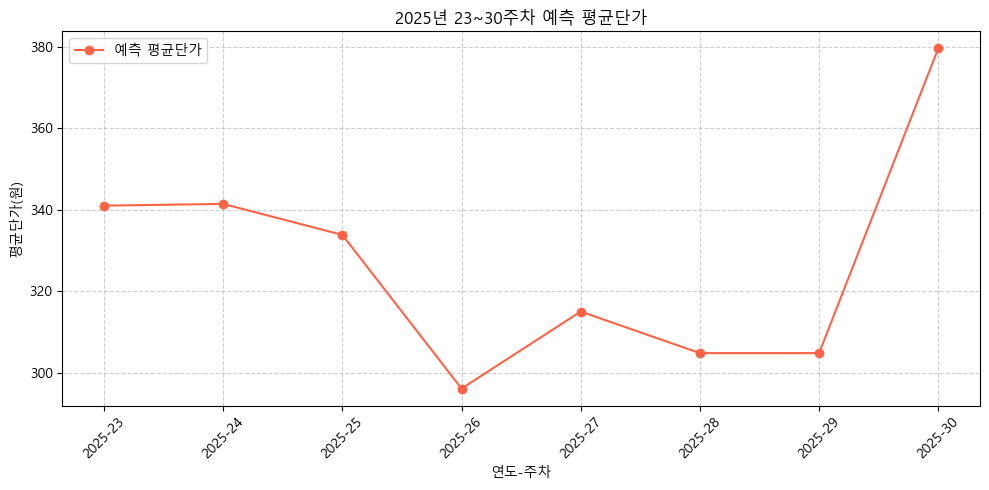

In [48]:
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞ Í∏∞Ï§Ä)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(result_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"], result_df["ÏòàÏ∏°Í∞í"], marker="o", color="tomato", label="ÏòàÏ∏° ÌèâÍ∑†Îã®Í∞Ä")
plt.title("2025ÎÖÑ 23~30Ï£ºÏ∞® ÏòàÏ∏° ÌèâÍ∑†Îã®Í∞Ä")
plt.xlabel("Ïó∞ÎèÑ-Ï£ºÏ∞®")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("EDA/Î¨¥(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding="cp949")
df = df.drop(columns=["Îì±Í∏âÏΩîÎìú"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 2. Ï£ºÍ∏∞ ÌååÏÉùÎ≥ÄÏàò
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 3. ÌèâÍ∑†Îã®Í∞Ä Ïù¥ÎèôÎ≥ÄÏàò Ï∂îÍ∞Ä (ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìúÎ≥Ñ Í∑∏Î£π)
group_cols = ["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"]
df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)_lag1"] = df.groupby(group_cols)["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"].shift(1)
df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)_lag2"] = df.groupby(group_cols)["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"].shift(2)
df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)_ma3"] = (
    df.groupby(group_cols)["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"]
    .shift(1)
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)
df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)_ma5"] = (
    df.groupby(group_cols)["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"]
    .shift(1)
    .rolling(window=5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

In [34]:
# 4. Î≥ÄÏàò Ï†ïÏùò
target_col = "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"
lag_features = [col for col in df.columns if "_t-" in col]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["ÌíàÏ¢ÖÏΩîÎìú"]
numeric_features = ["Ï¥ùÍ±∞ÎûòÎüâ(kg)", "week_sin", "week_cos"]
price_features = ["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)_lag1", "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)_lag2", "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)_ma3", "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)_ma5"]

used_features = (
    numeric_features + lag_features + derived_features +
    categorical_cols + price_features + ["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú", "year", "week", "week_start"]
)

# 5. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Î∞è ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
df_model = df.dropna(subset=[target_col] + used_features).copy()
df_model = df_model[df_model["year"] <= 2024].copy()


In [35]:
# 6. KFold ÌÉÄÍ≤üÏù∏ÏΩîÎî© (ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
df_model["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú_te"] = np.nan

for train_idx, val_idx in kf.split(df_model):
    train_fold = df_model.iloc[train_idx]
    val_fold = df_model.iloc[val_idx]
    means = train_fold.groupby("ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú")[target_col].mean()
    df_model.iloc[val_idx, df_model.columns.get_loc("ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú_te")] = val_fold["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"].map(means)

global_mean = df_model[target_col].mean()
df_model["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú_te"] = df_model["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú_te"].fillna(global_mean)

# 7. ÌíàÏ¢ÖÏΩîÎìú ÏõêÌï´Ïù∏ÏΩîÎî©
df_model = pd.get_dummies(df_model, columns=["ÌíàÏ¢ÖÏΩîÎìú"])

# 8. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
y = df_model[target_col]
X = df_model.drop(columns=["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)", "year", "week", "week_start", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

# XGB Í∏∞Î≥∏ Î™®Îç∏
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# XGB Í∏∞Î≥∏ Î™®Îç∏
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Í∑∏Î¶¨Îìú ÌÉêÏÉâ ÎåÄÏÉÅ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ (Ï†ÅÎãπÌïú Î≤îÏúÑÎ°ú ÏÑ§Ï†ï)
param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [6, 8],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# GridSearchCV Ï†ïÏùò
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1  # Î™®Îì† CPU ÏΩîÏñ¥ ÏÇ¨Ïö©
)

# ÌïôÏäµ (X, yÎäî Í∏∞Ï°¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©)
grid_search.fit(X, y)

# Í≤∞Í≥º Ï∂úÎ†•
print("üìå ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(grid_search.best_params_)

print(f"‚úÖ ÌèâÍ∑† RMSE (cross-val): {-grid_search.best_score_:.2f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
# 9. Î™®Îç∏ ÌïôÏäµ
best_model = XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.05,
    max_depth=6,
    n_estimators=200,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)
best_model.fit(X, y)

In [ ]:
# 10. ÌèâÍ∞Ä Ï∂úÎ†•
y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"‚úÖ RMSE (train): {rmse:.2f}")
print(f"‚úÖ MAE (train): {mae:.2f}")
print(f"‚úÖ R¬≤ Score (train): {r2:.4f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2025ÎÖÑ ÌÖåÏä§Ìä∏ÏÖã ÏÉùÏÑ±
test_df = df[df["year"] == 2025].dropna(subset=used_features).copy()
y_test = test_df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"]

# ÌÉÄÍ≤ü Î∞è ÏûÖÎ†• Î≥ÄÏàò Íµ¨ÏÑ±
X_test = test_df.drop(columns=["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)", "year", "week", "week_start", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"], errors="ignore")
X_test = pd.get_dummies(X_test, columns=["ÌíàÏ¢ÖÏΩîÎìú"])

# ÌïôÏäµÏóê ÏÇ¨Ïö©Îêú Ïª¨Îüº Î™©Î°ùÍ≥º ÎèôÏùºÌïòÍ≤å Ï†ïÎ¶¨
model_cols = best_model.feature_names_in_
missing_cols = set(model_cols) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[model_cols]  # Ïª¨Îüº ÏàúÏÑú ÏùºÏπò

# ÏòàÏ∏°
y_pred = best_model.predict(X_test)

# ÏãúÍ∞ÅÌôî Ï§ÄÎπÑ
plt.rcParams["font.family"] = "Malgun Gothic"  # ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams["axes.unicode_minus"] = False

test_df = test_df.copy()
test_df["ÏòàÏ∏°Í∞í"] = y_pred
test_df["Ïã§Ï†úÍ∞í"] = y_test.values

# ÏµúÍ∑º 52Ï£º Ï†ïÎ≥¥ Ï†ïÎ¶¨
recent_weeks = (
    test_df[["year", "week", "week_start"]]
    .drop_duplicates()
    .sort_values("week_start")
    .tail(52)
    .reset_index(drop=True)
)
recent_weeks["Ïó∞ÎèÑ_Ï£ºÏ∞®"] = recent_weeks["year"].astype(str) + "-" + recent_weeks["week"].astype(str).str.zfill(2)

# Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑†Îã®Í∞Ä ÏßëÍ≥Ñ
weekly_result = (
    test_df.groupby(["year", "week"])[["Ïã§Ï†úÍ∞í", "ÏòàÏ∏°Í∞í"]]
    .mean()
    .reset_index()
)
weekly_result["Ïó∞ÎèÑ_Ï£ºÏ∞®"] = weekly_result["year"].astype(str) + "-" + weekly_result["week"].astype(str).str.zfill(2)

# ÎàÑÎùΩ Ï£ºÏ∞® Ìè¨Ìï® Ï†ïÎ†¨
plot_df = recent_weeks.merge(weekly_result, on=["year", "week", "Ïó∞ÎèÑ_Ï£ºÏ∞®"], how="left")

In [ ]:
# ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 6))
plt.plot(plot_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"], plot_df["Ïã§Ï†úÍ∞í"], label="Ïã§Ï†ú ÌèâÍ∑†Îã®Í∞Ä", marker="o")
plt.plot(plot_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"], plot_df["ÏòàÏ∏°Í∞í"], label="ÏòàÏ∏° ÌèâÍ∑†Îã®Í∞Ä", marker="x")
plt.title("ÏòàÏ∏° vs Ïã§Ï†ú ÌèâÍ∑†Îã®Í∞Ä (ÏµúÍ∑º 1ÎÖÑ, Ï£ºÏ∞®Î≥Ñ)")
plt.xlabel("Ïó∞ÎèÑ-Ï£ºÏ∞®")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)")
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("üìä ÏòàÏ∏°Í∞í Î∂ÑÏÇ∞:", np.std(y_pred))
print("üìä Ïã§Ï†úÍ∞í Î∂ÑÏÇ∞:", np.std(y_test.values))

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost.callback import EarlyStopping

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("EDA/Î¨¥(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå_Î≥ëÌï©.csv", encoding="cp949")
df = df.drop(columns=["Îì±Í∏âÏΩîÎìú"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 2. Ï£ºÍ∏∞ ÌååÏÉùÎ≥ÄÏàò
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 3. Î≥ÄÌôîÏú® Í∏∞Î∞ò ÌååÏÉùÎ≥ÄÏàò
group_cols = ["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"]
df["Ï¥ùÍ±∞ÎûòÎüâ_lag1"] = df.groupby(group_cols)["Ï¥ùÍ±∞ÎûòÎüâ(kg)"].shift(1)
df["Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú®"] = np.where(
    df["Ï¥ùÍ±∞ÎûòÎüâ_lag1"] == 0,
    0,
    (df["Ï¥ùÍ±∞ÎûòÎüâ(kg)"] - df["Ï¥ùÍ±∞ÎûòÎüâ_lag1"]) / df["Ï¥ùÍ±∞ÎûòÎüâ_lag1"]
)
df["ÌèâÍ∑†Îã®Í∞Ä_Ï†ÑÎÖÑÎèôÏ£º"] = df.groupby(group_cols)["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"].shift(52)
df["ÌèâÍ∑†Îã®Í∞Ä_Ï†ÑÎÖÑÎπÑ"] = (df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"] - df["ÌèâÍ∑†Îã®Í∞Ä_Ï†ÑÎÖÑÎèôÏ£º"]) / df["ÌèâÍ∑†Îã®Í∞Ä_Ï†ÑÎÖÑÎèôÏ£º"]

# 4. Î≥ÄÏàò Ï†ïÏùò
target_col = "ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"
lag_features = [col for col in df.columns if "_t-" in col]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["ÌíàÏ¢ÖÏΩîÎìú"]
numeric_features = ["Ï¥ùÍ±∞ÎûòÎüâ(kg)", "week_sin", "week_cos"]
change_features = ["Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú®", "ÌèâÍ∑†Îã®Í∞Ä_Ï†ÑÎÖÑÎπÑ"]

used_features = (
    numeric_features + lag_features + derived_features +
    categorical_cols + change_features + ["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú", "year", "week", "week_start"]
)

In [2]:
# 5. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ + 2024ÎÖÑÍπåÏßÄ ÌïôÏäµÎç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
df_model = df.dropna(subset=[target_col] + used_features).copy()
df_model = df_model[df_model["year"] <= 2024].copy()

# 6. Label Encoding: ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú
le = LabelEncoder()
df_model["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú_le"] = le.fit_transform(df_model["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"])

# 7. ÌíàÏ¢ÖÏΩîÎìú ÏõêÌï´Ïù∏ÏΩîÎî©
df_model = pd.get_dummies(df_model, columns=["ÌíàÏ¢ÖÏΩîÎìú"])

# 8. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
y = df_model[target_col]
X = df_model.drop(columns=["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)", "year", "week", "week_start", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

# 9. Train/Validation Î∂ÑÌï† (ÏãúÍ∞Ñ ÏàúÏÑú Ïú†ÏßÄ)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [3]:
# 10. RandomizedSearchCV with TimeSeriesSplit
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
param_dist = {
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "gamma": [0, 1, 5],
    "n_estimators": [100, 150, 200, 300]
}

tscv = TimeSeriesSplit(n_splits=3)
rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rand_search.fit(X, y)

print("üìå ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(rand_search.best_params_)
print(f"‚úÖ ÌèâÍ∑† RMSE (cross-val): {-rand_search.best_score_:.2f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits


KeyboardInterrupt: 

In [ ]:
# 11. ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Ïû¨ÌïôÏäµ (Ï°∞Í∏∞ Ï¢ÖÎ£å Ìè¨Ìï®)
best_model = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    **rand_search.best_params_
)

best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[EarlyStopping(rounds=30)],
    verbose=True
)

# 12. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
y_val_pred = best_model.predict(X_val)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"‚úÖ RMSE (val): {rmse:.2f}")
print(f"‚úÖ MAE (val): {mae:.2f}")
print(f"‚úÖ R¬≤ Score (val): {r2:.4f}")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# ÌïôÏäµÏö© LabelEncoder Ï†ïÏùò Î∞è ÌïôÏäµ
le = LabelEncoder()
le.fit(df_model["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"])  # df_modelÏùÄ year <= 2024

# ÌÖåÏä§Ìä∏ÏÖã ÎåÄÏÉÅ ÏÇ∞ÏßÄÏΩîÎìú
test_df = df[df["year"] == 2025].copy()
test_regions = set(test_df["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"].unique())
train_regions = set(le.classes_)

# ÌÖåÏä§Ìä∏ÏÖãÏóê ÌïôÏäµÏÖãÏóê ÏóÜÎçò ÏÇ∞ÏßÄÏΩîÎìúÍ∞Ä ÏûàÎäîÍ∞Ä?
unseen_regions = test_regions - train_regions

if unseen_regions:
    print(f"‚ö†Ô∏è ÌÖåÏä§Ìä∏ÏÖãÏóê ÌïôÏäµÏÖãÏóê ÏóÜÎçò LabelEncoder ÌÅ¥ÎûòÏä§ Ï°¥Ïû¨: {unseen_regions}")
else:
    print("‚úÖ LabelEncoder: ÌÖåÏä§Ìä∏ÏÖãÏùò ÏÇ∞ÏßÄÏΩîÎìúÎäî ÌïôÏäµÏÖãÏóê Î™®Îëê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå.")

In [ ]:
# Ï¥ù ÌïôÏäµ ÏÉòÌîå Ïàò
n_samples = X.shape[0]

# Ï¥ù ÌîºÏ≤ò Ïàò
n_features = X.shape[1]

print(f"üì¶ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïàò: {n_samples}")
print(f"üî¢ ÌîºÏ≤ò Ïàò: {n_features}")
print(f"üìê ÏÉòÌîåÎãπ ÌîºÏ≤ò ÎπÑÏú®: {n_samples / n_features:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1. Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú (Gain Í∏∞Ï§Ä)
importance = best_model.get_booster().get_score(importance_type="gain")
importance_df = pd.DataFrame({
    "feature": list(importance.keys()),
    "importance": list(importance.values())
})
importance_df = importance_df.sort_values("importance", ascending=False).reset_index(drop=True)

# 2. ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàòÎßå ÏãúÍ∞ÅÌôî
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"][:top_n][::-1], importance_df["importance"][:top_n][::-1])
plt.xlabel("Importance (Gain)")
plt.title(f"Top {top_n} Feature Importance (by Gain)")
plt.tight_layout()
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.show()

In [ ]:
# Î≥ÄÏàò Ï§ëÏöîÎèÑ ÎîïÏÖîÎÑàÎ¶¨ (Gain Í∏∞Ï§Ä)
importance_dict = best_model.get_booster().get_score(importance_type="gain")

# Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú® Ï§ëÏöîÎèÑ ÌôïÏù∏
target_feature = "Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú®"
importance_value = importance_dict.get(target_feature, 0)

print(f"üìå 'Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú®' Ï§ëÏöîÎèÑ (Gain): {importance_value:.4f}")

In [ ]:
import pandas as pd

# Î≥ÄÏàò Ï§ëÏöîÎèÑ (Gain Í∏∞Ï§Ä) Ï†ïÎ†¨
importance_dict = best_model.get_booster().get_score(importance_type="gain")
importance_df = pd.DataFrame({
    "feature": list(importance_dict.keys()),
    "importance": list(importance_dict.values())
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

# ÏàúÏúÑ Î∂ÄÏó¨ (1ÏúÑÎ∂ÄÌÑ∞ ÏãúÏûë)
importance_df["rank"] = importance_df.index + 1

# 'Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú®'Ïùò ÏàúÏúÑ ÌôïÏù∏
target_feature = "Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú®"
target_row = importance_df[importance_df["feature"] == target_feature]

if not target_row.empty:
    rank = int(target_row["rank"].values[0])
    gain = float(target_row["importance"].values[0])
    print(f"üìä 'Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú®'Ïùò Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏàúÏúÑ: {rank}ÏúÑ / Ï¥ù {len(importance_df)}Í∞ú Î≥ÄÏàò Ï§ë")
    print(f"üìà Gain Í∞í: {gain:.2f}")
else:
    print("‚ùå 'Ï¥ùÍ±∞ÎûòÎüâ_Î≥ÄÌôîÏú®'ÏùÄ Î≥ÄÏàò Ï§ëÏöîÎèÑ Î™©Î°ùÏóê ÏóÜÏäµÎãàÎã§.")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 2025ÎÖÑ ÌÖåÏä§Ìä∏ÏÖã Ï§ÄÎπÑ
test_df = df[df["year"] == 2025].copy()

# 2. Ïã§Ï†úÍ∞í Î∂ÑÎ¶¨ (Blind Test)
y_test = test_df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"].copy()
test_df = test_df.drop(columns=["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"])

# 3. ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú Label Encoding Ï†ÅÏö©
known_codes = set(le.classes_)
test_df = test_df[test_df["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"].isin(known_codes)].copy()
y_test = y_test.loc[test_df.index]  # y_testÎèÑ ÎèôÏùºÌïòÍ≤å index ÎßûÏ∂îÍ∏∞
test_df["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú_le"] = le.transform(test_df["ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"])

# 4. ÌíàÏ¢ÖÏΩîÎìú ÏõêÌï´Ïù∏ÏΩîÎî©
test_df = pd.get_dummies(test_df, columns=["ÌíàÏ¢ÖÏΩîÎìú"])

# 5. ÎàÑÎùΩÎêú ÌíàÏ¢ÖÏΩîÎìú Ïª¨Îüº Ï∂îÍ∞Ä
missing_cols = set(df_model.columns) - set(test_df.columns)
missing_cols = [col for col in missing_cols if col.startswith("ÌíàÏ¢ÖÏΩîÎìú_")]
for col in missing_cols:
    test_df[col] = 0

# 6. ÌÖåÏä§Ìä∏ÏÖã Ïª¨Îüº Ï†ïÎ¶¨ (ÏòàÏ∏°Ïóê ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú)
X_test = test_df.drop(columns=["year", "week", "week_start", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"], errors="ignore")
X_test = X_test.select_dtypes(include=[np.number])

# 7. Ïª¨Îüº ÏàúÏÑú ÎßûÏ∂îÍ∏∞
X_test = X_test[best_model.feature_names_in_].astype(np.float32)

# 8. ÏòàÏ∏° ÏàòÌñâ
y_pred = best_model.predict(X_test)

# 9. ÌèâÍ∞Ä Ï∂úÎ†•
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"‚úÖ RMSE (test): {rmse:.2f}")
print(f"‚úÖ MAE (test): {mae:.2f}")
print(f"‚úÖ R¬≤ Score (test): {r2:.4f}")

In [ ]:
import matplotlib.pyplot as plt

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# ‚úÖ 1. ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í Ï†ïÎ¶¨
plot_df = test_df.copy()
plot_df = plot_df.reset_index(drop=True)  # Ïù∏Îç±Ïä§ Ï†ïÎ†¨
plot_df["ÏòàÏ∏°Í∞í"] = y_pred
plot_df["Ïã§Ï†úÍ∞í"] = y_test.reset_index(drop=True)

# ‚úÖ 2. Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† ÏßëÍ≥Ñ
weekly_avg = (
    plot_df.groupby(["year", "week"])[["Ïã§Ï†úÍ∞í", "ÏòàÏ∏°Í∞í"]]
    .mean()
    .reset_index()
)
weekly_avg["Ïó∞ÎèÑ_Ï£ºÏ∞®"] = (
    weekly_avg["year"].astype(str) + "-" + weekly_avg["week"].astype(str).str.zfill(2)
)

# ‚úÖ 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 6))
plt.plot(weekly_avg["Ïó∞ÎèÑ_Ï£ºÏ∞®"], weekly_avg["Ïã§Ï†úÍ∞í"], label="Ïã§Ï†ú ÌèâÍ∑†Îã®Í∞Ä", marker="o", linewidth=2)
plt.plot(weekly_avg["Ïó∞ÎèÑ_Ï£ºÏ∞®"], weekly_avg["ÏòàÏ∏°Í∞í"], label="ÏòàÏ∏° ÌèâÍ∑†Îã®Í∞Ä", marker="x", linewidth=2)
plt.title("ÏòàÏ∏° vs Ïã§Ï†ú ÌèâÍ∑†Îã®Í∞Ä (Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑†)")
plt.xlabel("Ïó∞ÎèÑ-Ï£ºÏ∞®")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)")
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1. 1~22Ï£ºÏ∞® Ïã§Ï†úÍ∞í Î∞è ÏòàÏ∏°Í∞í
part1_df = test_df.copy()
part1_df["ÏòàÏ∏°Í∞í"] = y_pred
part1_df["Ïã§Ï†úÍ∞í"] = y_test.values
part1_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"] = part1_df["year"].astype(str) + "-" + part1_df["week"].astype(str).str.zfill(2)

# Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑† ÏßëÍ≥Ñ
part1_avg = (
    part1_df.groupby(["year", "week", "Ïó∞ÎèÑ_Ï£ºÏ∞®"])[["Ïã§Ï†úÍ∞í", "ÏòàÏ∏°Í∞í"]]
    .mean()
    .reset_index()
)

# 2. 23~52Ï£ºÏ∞®: Ï†ïÎ≥¥ ÏóÜÏùå ‚Üí ÎßàÏßÄÎßâ ÏòàÏ∏°Í∞í Ïú†ÏßÄ
last_pred = part1_avg["ÏòàÏ∏°Í∞í"].iloc[-1]
weeks_future = pd.DataFrame({
    "year": [2025]*30,
    "week": list(range(23, 53)),
})
weeks_future["Ïó∞ÎèÑ_Ï£ºÏ∞®"] = weeks_future["year"].astype(str) + "-" + weeks_future["week"].astype(str).str.zfill(2)
weeks_future["ÏòàÏ∏°Í∞í"] = last_pred
weeks_future["Ïã§Ï†úÍ∞í"] = np.nan  # Ïã§Ï†úÍ∞í ÏóÜÏùå

# 3. Î≥ëÌï©
plot_df = pd.concat([part1_avg, weeks_future], ignore_index=True)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 6))
plt.plot(plot_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"], plot_df["ÏòàÏ∏°Í∞í"], label="ÏòàÏ∏° ÌèâÍ∑†Îã®Í∞Ä", marker="o", linewidth=2)
plt.plot(plot_df["Ïó∞ÎèÑ_Ï£ºÏ∞®"], plot_df["Ïã§Ï†úÍ∞í"], label="Ïã§Ï†ú ÌèâÍ∑†Îã®Í∞Ä", marker="x", linewidth=2)
plt.title("2025ÎÖÑ ÌèâÍ∑†Îã®Í∞Ä (1~22Ï£º: Ïã§Ï†ú+ÏòàÏ∏° / 23~52Ï£º: Ï†ïÎ≥¥ ÏóÜÏùå, ÏòàÏ∏° Ïó∞Ïû•)")
plt.xlabel("Ïó∞ÎèÑ-Ï£ºÏ∞®")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)")
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()